In [2]:
!pip install segyio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
#Data_Exploration

In [3]:
import segyio
from matplotlib import pyplot as plt
import numpy as np

In [11]:
filename_pp = "/content/issap20_Pp.sgy"
filename_ai = "/content/issap20_AI.sgy"
filename_fault = "/content/issap20_Fault.sgy"

In [13]:
path_slb_isFault = "/content/Schlumberger_800_SLB_Force_Fault_Model_IsFault.segy"

In [14]:
# Note: the the xline header info location is at segyio.su.cdpx [181]
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename, xline=181) as segyfile:
        return segyio.tools.cube(segyfile)

seismic = segy2numpy(filename_pp)
ai = segy2numpy(filename_ai)
fault = segy2numpy(filename_fault)

In [15]:
print(type(seismic))
print(fault.shape)
print(np.unique(fault))

<class 'numpy.ndarray'>
(101, 589, 751)
[0. 1.]


In [16]:
f"Number of inlines: {seismic.shape[0]}, crosslines: {seismic.shape[1]}, samples: {seismic.shape[2]}"

'Number of inlines: 101, crosslines: 589, samples: 751'

In [17]:
def plot(synth, ai, fault, line_type, line_num):

    ILINE = line_num
    XLINE = line_num

    plt.figure(figsize=(10, 10))
    title = ['Synthetic_Seismic', 'AI']
    cmaps = ["seismic", None]

    print('\nPlotting ', line_type.upper(), ILINE)

    for i, cube in enumerate([synth, ai]):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])

        if line_type == 'inline':

            plt.imshow(cube[ILINE,:, :].T, cmap=cmaps[i])
            plt.imshow(fault[ILINE,:, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
            plt.axis()
        elif line_type == 'xline':

            plt.imshow(cube[:,XLINE, :].T, cmap=cmaps[i])
            plt.imshow(fault[:,XLINE, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
            plt.axis()
    plt.show()


Plotting  INLINE 10


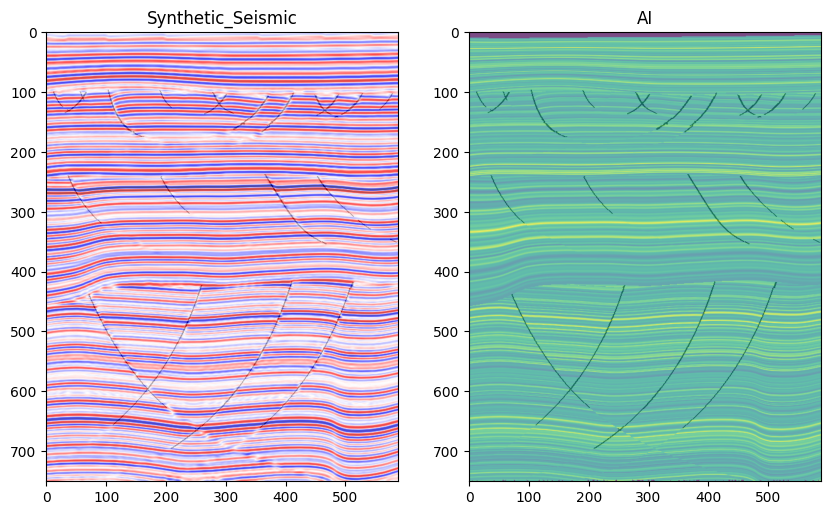

In [18]:
plot(seismic, ai, fault, line_type='inline', line_num=10)


Plotting  XLINE 100


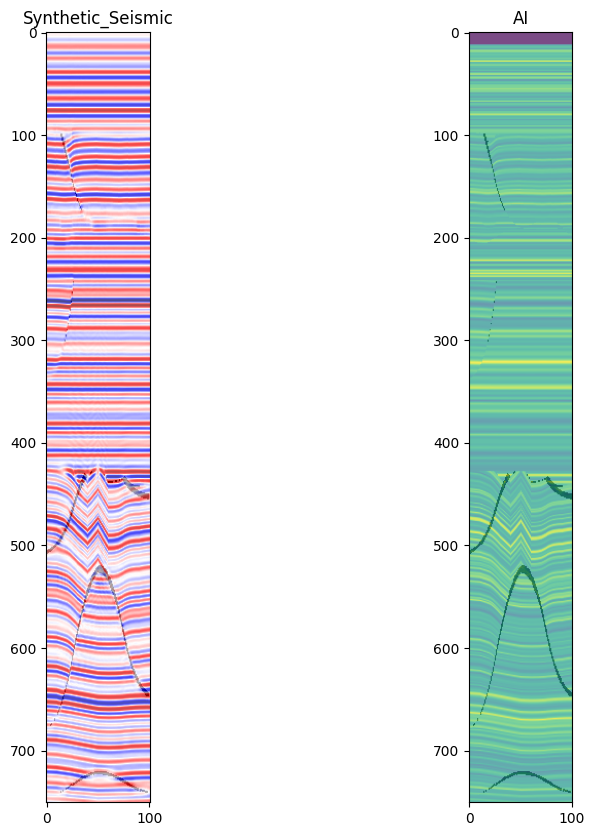

In [19]:
plot(seismic, ai, fault, line_type='xline', line_num=100)

In [20]:
import ipywidgets as widgets

In [21]:
plot_output = widgets.Output()

plot_button = widgets.Button(
    description = 'Show images',
    disabled=False,
    button_style = '',
    tooltip = 'click to plot image.')

def on_button_clicked(b):
    plot_output.clear_output()
    with plot_output:
        plot(seismic, ai, fault, line_type='xline', line_num=50)

plot_button.on_click(on_button_clicked)


display(plot_button)
display(plot_output)

Button(description='Show images', style=ButtonStyle(), tooltip='click to plot image.')

Output()

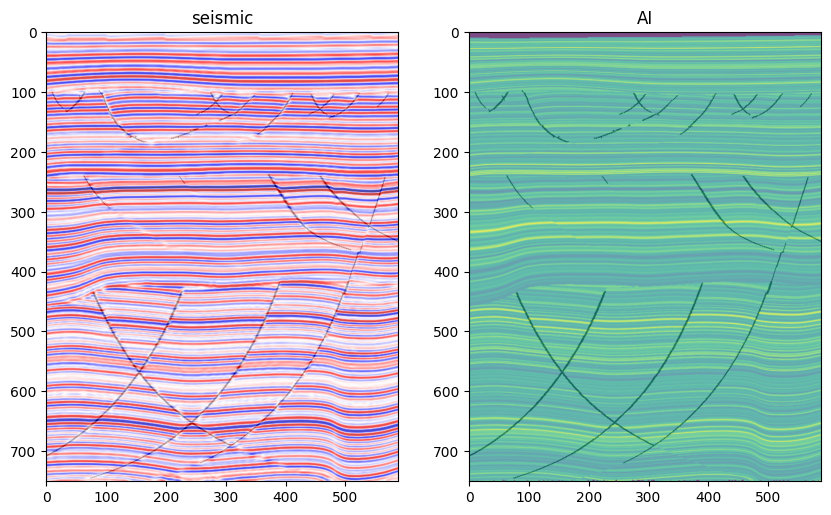

In [22]:
# plot inline
ILINE=20
plt.figure(figsize=(10, 10))
title = ['seismic', 'AI']
cmaps = ["seismic", None]

for i, cube in enumerate([seismic, ai]):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.imshow(cube[ILINE,:, :].T, cmap=cmaps[i])
    plt.imshow(fault[ILINE,:, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
    plt.axis()
plt.show()

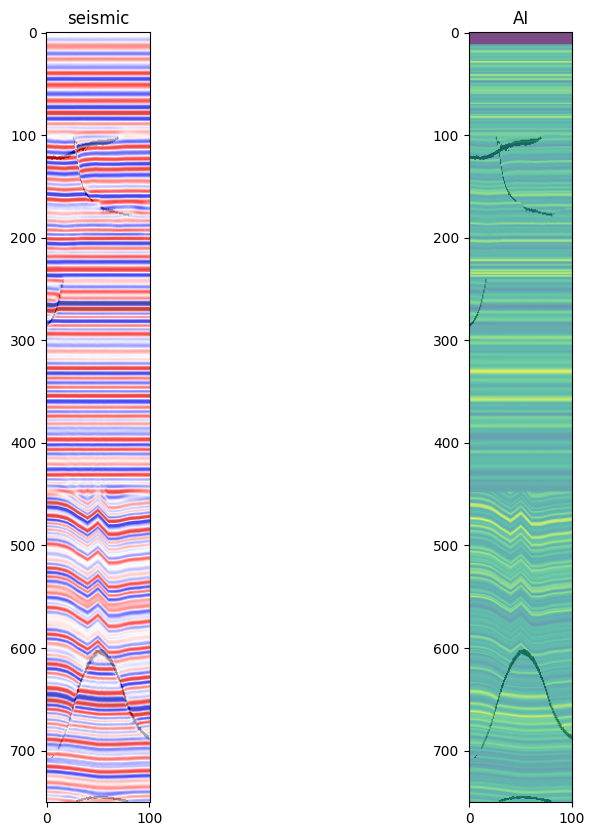

In [23]:
# plot crossline
XLINE=50
plt.figure(figsize=(10, 10))
title = ['seismic', 'AI']
cmaps = ["seismic", None]

for i, cube in enumerate([seismic, ai]):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.imshow(cube[:,XLINE, :].T, cmap=cmaps[i])
    plt.imshow(fault[:,XLINE, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
    plt.axis()
plt.show()

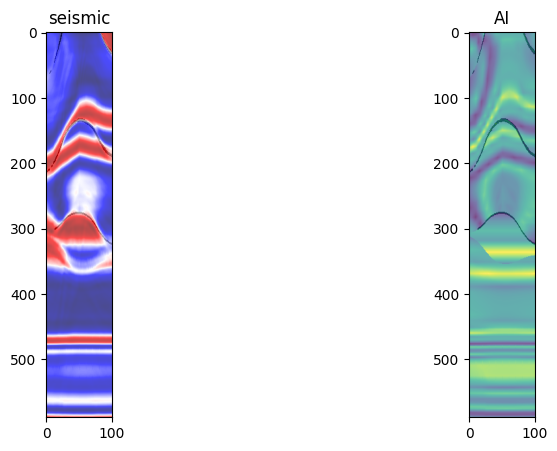

In [24]:
# plot crossline
DEPTH=700
plt.figure(figsize=(10, 5))
title = ['seismic', 'AI']
cmaps = ["seismic", None]

for i, cube in enumerate([seismic, ai]):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.imshow(cube[:,:, DEPTH].T, cmap=cmaps[i])
    plt.imshow(fault[:,:, DEPTH].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
    plt.axis()
plt.show()

In [29]:
# Load slb synthetics
path_slb_isFault = "/content/Schlumberger_800_SLB_Force_Fault_Model_IsFault.segy"

In [30]:
fault_slb = segy2numpy(path_slb_isFault)

In [31]:
fault_slb.shape
df=fault_slb[0]
df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

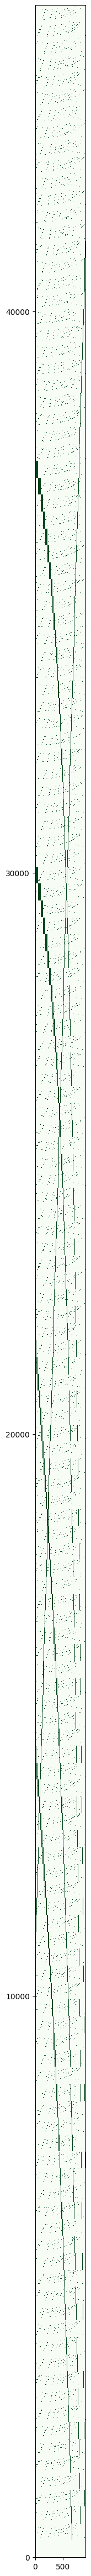

In [32]:
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(60)
c=plt.imshow(df, cmap ='Greens',  interpolation ='nearest', origin ='lower')
plt.show()